**SET UP**

In [1]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.max_columns', None)

In [3]:
import collections
from functools import cached_property
import logging
import warnings

In [4]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

# Ignoramos los Warning
pd.options.mode.chained_assignment = None 

In [13]:
race = ff1.get_session(2023, 'Monaco', 'R')
quali = ff1.get_session(2023, 'Monaco', 'Q')

In [14]:
race

In [15]:
laps_r = race.load_laps(with_telemetry=True)
laps_q = quali.load_laps(with_telemetry=True)

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '27', '20', '2', '77', '18', '23', '21', '81', '4', '22', '63', '10', '16', '44', '55', '31', '14', '24', '11']
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.3.0]
api   

In [16]:
laps_r.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:27.458000,1,NaT,1,0 days 00:11:44.707000,NaT,NaT,0 days 00:00:37.420000,0 days 00:00:21.053000,NaT,0 days 01:03:06.559000,0 days 01:03:27.543000,178.0,182.0,255.0,271.0,False,MEDIUM,1.0,True,1,0 days 01:02:02.950000,Red Bull Racing,VER,2,False,2023-05-28 13:03:03.927
1,0 days 01:04:46.825000,1,0 days 00:01:19.367000,2,NaT,NaT,0 days 00:00:20.954000,0 days 00:00:37.366000,0 days 00:00:21.047000,0 days 01:03:48.412000,0 days 01:04:25.778000,0 days 01:04:46.825000,186.0,182.0,256.0,259.0,False,MEDIUM,2.0,True,1,0 days 01:03:27.458000,Red Bull Racing,VER,1,True,2023-05-28 13:04:28.435
2,0 days 01:06:05.899000,1,0 days 00:01:19.074000,3,NaT,NaT,0 days 00:00:20.854000,0 days 00:00:37.288000,0 days 00:00:20.932000,0 days 01:05:07.679000,0 days 01:05:44.967000,0 days 01:06:05.899000,193.0,183.0,255.0,260.0,False,MEDIUM,3.0,True,1,0 days 01:04:46.825000,Red Bull Racing,VER,1,True,2023-05-28 13:05:47.802
3,0 days 01:07:24.028000,1,0 days 00:01:18.129000,4,NaT,NaT,0 days 00:00:20.835000,0 days 00:00:36.637000,0 days 00:00:20.657000,0 days 01:06:26.734000,0 days 01:07:03.371000,0 days 01:07:24.028000,192.0,187.0,256.0,259.0,False,MEDIUM,4.0,True,1,0 days 01:06:05.899000,Red Bull Racing,VER,1,True,2023-05-28 13:07:06.876
4,0 days 01:08:42.047000,1,0 days 00:01:18.019000,5,NaT,NaT,0 days 00:00:20.745000,0 days 00:00:36.734000,0 days 00:00:20.540000,0 days 01:07:44.773000,0 days 01:08:21.507000,0 days 01:08:42.047000,188.0,187.0,256.0,260.0,False,MEDIUM,5.0,True,1,0 days 01:07:24.028000,Red Bull Racing,VER,1,True,2023-05-28 13:08:25.005


In [17]:
fastest_lap = laps_r.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Piloto: ',fastest_lap['Driver'])

Vuelta más rápida:  0 days 00:01:15.650000
Tipo de neumático:  HARD
Piloto:  HAM


In [18]:
laps_drive1 = laps_r.pick_driver('VER')
laps_drive2 = laps_r.pick_driver('HAM')
laps_drive3 = laps_r.pick_driver('ALO')

In [19]:
print(laps_drive1['LapNumber'].max())
print(laps_drive2['LapNumber'].max())

78
78


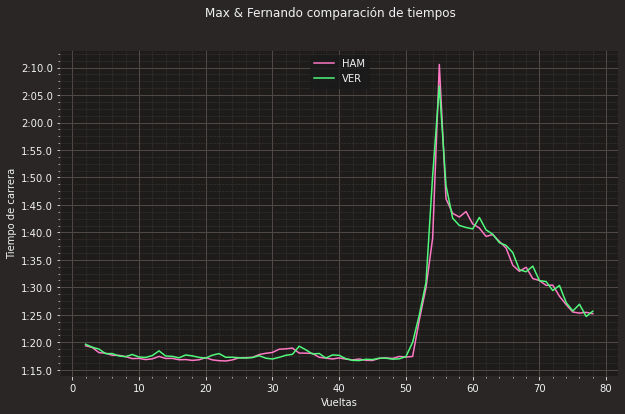

In [20]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots()
fig.suptitle(race.get_driver("VER").name + " & "+ race.get_driver("ALO").name + " comparación de tiempos")

ax.plot(laps_drive1['LapNumber'], laps_drive1['LapTime'], label='HAM')
ax.plot(laps_drive3['LapNumber'], laps_drive3['LapTime'], label='VER')
ax.set(ylabel='Tiempo de carrera', xlabel='Vueltas')
ax.legend(loc="upper center")

plt.show()

In [21]:
ver_lap = laps_r.pick_driver('VER')
alo_lap = laps_r.pick_driver('ALO')

In [22]:
alo_lastlap=alo_lap[alo_lap.LapNumber==58]
ver_lastlap=ver_lap[ver_lap.LapNumber==58]

In [23]:
print(f'Tiempo de la útima vuelta Alonso: ',alo_lastlap.LapTime)
print(f'Tiempo de la útima vuelta Verstappen: ',ver_lastlap.LapTime)

Tiempo de la útima vuelta Alonso:  1340   0 days 00:01:41.267000
Name: LapTime, dtype: timedelta64[ns]
Tiempo de la útima vuelta Verstappen:  57   0 days 00:01:42.808000
Name: LapTime, dtype: timedelta64[ns]
